# Data Analysis

In this notebook I will extract some statistics from the data and analyze them.

## Import the needed modules

In [1]:
import pandas
import ast
import matplotlib.pyplot as plt
from datetime import datetime

## Load the data

In [2]:
data_frame = pandas.read_csv('data/ted_updated.csv')
data_frame.head()

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,...,related_talks,speaker_occupation,tags,title,url,views,impressions,positive_impressions,negative_impressions,popularity
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,...,"[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110,93850.0,92712.0,1138.0,0.441611
1,265,With the same humor and humanity he exuded in ...,977,TED2006,1140825600,43,Al Gore,Al Gore: Averting the climate crisis,1,1151367060,...,"[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520,2936.0,2372.0,564.0,0.355374
2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,1140739200,26,David Pogue,David Pogue: Simplicity sells,1,1151367060,...,"[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292,2824.0,2473.0,351.0,0.393828
3,200,"In an emotionally charged talk, MacArthur-winn...",1116,TED2006,1140912000,35,Majora Carter,Majora Carter: Greening the ghetto,1,1151367060,...,"[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",Activist for environmental justice,"['MacArthur grant', 'activism', 'business', 'c...",Greening the ghetto,https://www.ted.com/talks/majora_carter_s_tale...,1697550,3728.0,3572.0,156.0,0.443118
4,593,You've never seen data presented like this. Wi...,1190,TED2006,1140566400,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,1151440680,...,"[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",Global health expert; data visionary,"['Africa', 'Asia', 'Google', 'demo', 'economic...",The best stats you've ever seen,https://www.ted.com/talks/hans_rosling_shows_t...,12005869,25620.0,25310.0,310.0,0.446907


# Lets statistics from the data

## Correlation between the number of languages and the popularity

### Laguages and comments

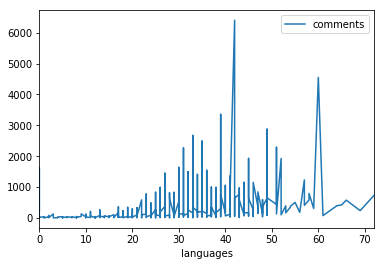

In [3]:
data_frame.sort_values(by=['languages']).plot.line(x='languages', y='comments')

### Languages and views

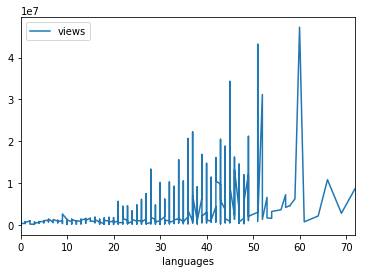

In [4]:
data_frame.sort_values(by=['languages']).plot.line(x='languages', y='views')

### Languages and positive impressions

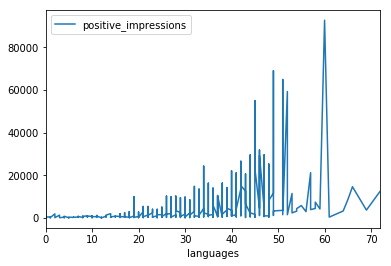

In [5]:
data_frame.sort_values(by=['languages']).plot.line(x='languages', y=['positive_impressions'])

### Languages and negative impressions

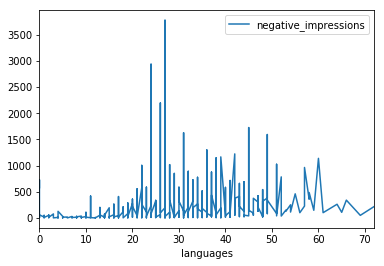

In [6]:
data_frame.sort_values(by=['languages']).plot.line(x='languages', y='negative_impressions')

### Languages and popularity

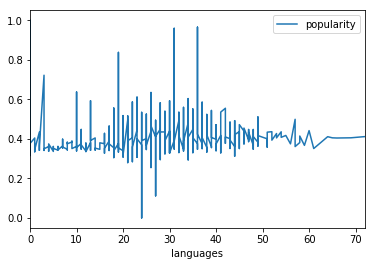

In [7]:
data_frame.sort_values(by=['languages']).plot.line(x='languages', y='popularity')

### Observation

Languages and popularity are definately sound related. Not necesserily because more popularity is expected when there are more languages, it is true the other way around too. If a talk is more popular, it will have better chances to be translated in more languages.

Here we can see that more languages definately lead to more comments and impressions, at least to some point. And also it leads to a lot more views. Because, the popularity metric takes into account coments and impressions over views, we can see the tendency that a mid range of languages leads to higher popularity rating.

## Publish Time And Weekday Statistics

Lets extract some statistics about the popularity distribution across the different weekdays and hours of publishing.

In [8]:
data = {'Monday':{}, 'Tuesday':{}, 'Wednesday':{}, 'Thursday':{}, 'Friday':{}, 'Saturday':{}, 'Sunday':{}}

for i in range(0, len(data_frame.published_date)):
    date = datetime.fromtimestamp(data_frame.published_date[i])
    weekday = date.strftime("%A")
    hour = date.hour

    if hour not in data[weekday]:
        data[weekday][hour] = {"pub_count": 0, "total_views": 0, "total_comments":0, "total_impressions": 0, "popularity": 0}
    
    data[weekday][hour]["pub_count"] += 1
    data[weekday][hour]["total_views"] += data_frame.views[i]
    data[weekday][hour]["total_comments"] += data_frame.comments[i]
    data[weekday][hour]["total_impressions"] += data_frame.impressions[i]
    data[weekday][hour]["popularity"] += data_frame.popularity[i]
    

pub_count_data = {weekday:{hour:value["pub_count"] for hour, value in value.items()} for weekday, value in data.items()}
views_data = {weekday:{hour:value["total_views"]/value["pub_count"] for hour, value in value.items()} for weekday, value in data.items()}
comments_data = {weekday:{hour:value["total_comments"]/value["pub_count"] for hour, value in value.items()} for weekday, value in data.items()}
impressions_data = {weekday:{hour:value["total_impressions"]/value["pub_count"] for hour, value in value.items()} for weekday, value in data.items()}
popularity_data = {weekday:{hour:value["popularity"]/value["pub_count"] for hour, value in value.items()} for weekday, value in data.items()}

def showStats(data):
    stats = pandas.DataFrame.from_dict(data)
    stats = stats.fillna(0)

    values = stats.values.flatten()
    values.sort()
    mean = sum(values) / len(values)
    tenth_highest_value = values[-10]
    highest_value = values[-1]

    def highlight_above_mean(s):
        result = []
        for v in s:
            if v == highest_value:
                result.append('background-color: red; color: white')            
            elif v >= tenth_highest_value:
                result.append('background-color: orange')
            elif v > mean:
                result.append('background-color: yellow')
            else:
                result.append('')

        return result
    
    return stats.style.apply(highlight_above_mean)

### Publish counts per weekday and hour

In [9]:
showStats(pub_count_data)

,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
0,3,2,3,3,2,0,2
1,1,0,0,1,0,2,0
2,5,13,12,6,4,0,0
3,28,46,30,46,23,1,1
4,34,38,45,34,28,0,0
5,2,2,3,5,0,0,0
6,1,4,0,1,5,0,0
7,0,5,1,3,2,0,0
8,3,5,2,6,2,0,0
9,4,3,4,6,4,0,0


### Average views per weekday and hour

In [10]:
showStats(views_data)

,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
0,1.33946e+06,1.24327e+06,845775,1.2671e+06,1.49054e+06,0,471012
1,611092,0,0,1.03406e+06,0,6.05002e+06,0
2,1.5743e+06,1.18904e+06,2.11875e+06,4.12457e+06,4.78695e+06,0,0
3,2.09843e+06,3.21579e+06,1.91972e+06,1.49862e+06,1.56492e+06,3.30231e+06,4.7726e+06
4,1.46912e+06,1.47552e+06,2.12355e+06,1.10804e+06,1.25275e+06,0,0
5,2.61556e+06,904590,1.33601e+06,2.52503e+06,0,0,0
6,609087,1.20521e+06,0,3.83067e+06,278411,0,0
7,0,1.76059e+06,531957,1.08619e+06,847676,0,0
8,1.23696e+06,1.26041e+06,651948,1.53478e+06,525514,0,0
9,840138,2.29751e+06,699166,1.68367e+06,1.40279e+06,0,0


### Average comments per weekday and hour

In [11]:
showStats(comments_data)

,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
0,171.667,217,155.667,230.667,586,0,62.5
1,95,0,0,70,0,693.5,0
2,168.4,153.308,402.833,264,331.75,0,0
3,275.821,332.435,210.6,165.609,136.913,321,260
4,202.676,209.658,247.933,164.529,154.25,0,0
5,3245,61,130.667,489.4,0,0,0
6,49,145,0,537,80.6,0,0
7,0,136,60,106.667,58.5,0,0
8,120.333,85.4,100.5,157,54,0,0
9,138.5,137.333,100.75,145.833,386.5,0,0


### Average impressions per weekday and hour

In [12]:
showStats(impressions_data)

,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
0,3299,2753.5,1828.33,2382.67,3516.5,0,635
1,1722,0,0,1771,0,11124.5,0
2,1701,2016.62,3450.67,6520.33,9793.5,0,0
3,3657.25,5657.5,4147.43,2346.22,2213.96,7211,20745
4,2488.12,2693.29,3522.71,1851.41,1631.46,0,0
5,8085.5,1387,2505,8999.4,0,0,0
6,1171,2047.25,0,7753,530.2,0,0
7,0,3157,810,2461.67,1495,0,0
8,4210,1902.6,1551,3385,484,0,0
9,1491,4582,1382.75,2413.17,2885.25,0,0


### Average popularity per weekday and hour

In [13]:
showStats(popularity_data)

,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
0,0.444768,0.408087,0.413893,0.403018,0.433284,0,0.396683
1,0.471845,0,0,0.40268,0,0.398,0
2,0.3941,0.395771,0.40879,0.400295,0.392905,0,0
3,0.405171,0.417002,0.403941,0.403017,0.393771,0.454262,0.569186
4,0.400758,0.410332,0.397434,0.418049,0.381006,0,0
5,0.482584,0.386048,0.417965,0.423638,0,0,0
6,0.368598,0.412852,0,0.431659,0.407004,0,0
7,0,0.383205,0.413298,0.43139,0.401315,0,0
8,0.45963,0.395989,0.445538,0.407843,0.371279,0,0
9,0.381761,0.445301,0.42276,0.396766,0.431025,0,0


### Observation

Although most of TED talks are published in around 17/18 o'clock, during the week. This does not really affect their popularity. We can see that popularity, described via vies, comments and impressions is spread fairly even. And the extremums seem to be mostly random.

This leads to conclusion that publish time does not affect the popularity (at least not in long term).

## Tags count statistics

In [14]:
# lets first use the JSON parse function from the data preparation on the tags
def parseJsonInDataframe(df, columns):
    for i in range(0, df.shape[0]):
        for column in columns:
            if (column in df and type(df.at[i, column]) is str):
                df.at[i, column] = ast.literal_eval(df.at[i, column])

parseJsonInDataframe(data_frame, ["tags"])

for i in range(0, data_frame.shape[0]):
    data_frame.at[i, "tags_count"] = len(data_frame.at[i, "tags"])

### Tags count and comments

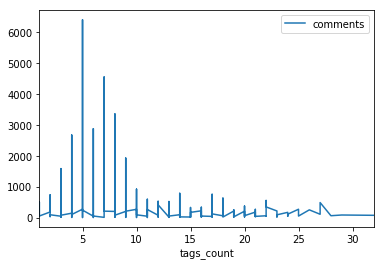

In [15]:
data_frame.sort_values(by=['tags_count']).plot.line(x='tags_count', y='comments')

### Tags count and views

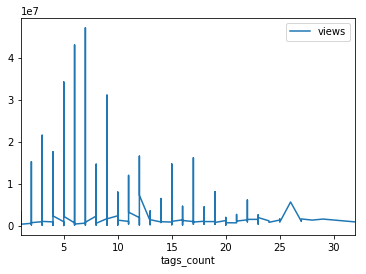

In [16]:
data_frame.sort_values(by=['tags_count']).plot.line(x='tags_count', y='views')

### Tags count and positive imressions

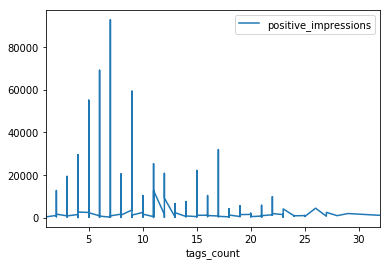

In [17]:
data_frame.sort_values(by=['tags_count']).plot.line(x='tags_count', y=['positive_impressions'])

### Tags count and negative impressions

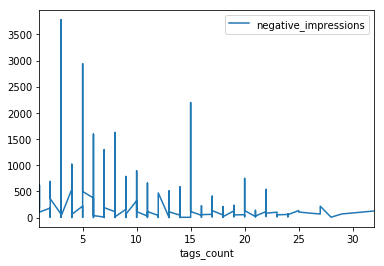

In [18]:
data_frame.sort_values(by=['tags_count']).plot.line(x='tags_count', y=['negative_impressions'])

### Tags count and popularity

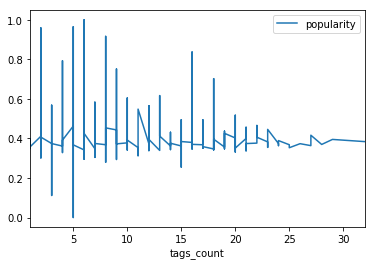

In [19]:
data_frame.sort_values(by=['tags_count']).plot.line(x='tags_count', y='popularity')

### Observation

Too much tags seem to have negative effect on populriy. Five to ten tags seem to have the best effect.

## Duration over popularity

### Duration and comments

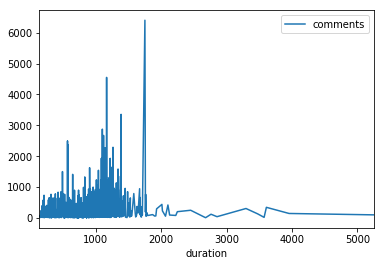

In [20]:
data_frame.sort_values(by=['duration']).plot.line(x='duration', y='comments')

### Duration and views

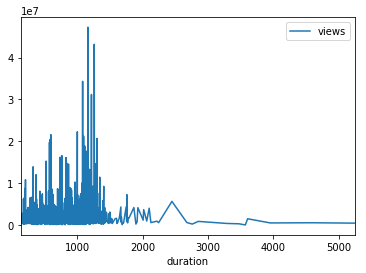

In [21]:
data_frame.sort_values(by=['duration']).plot.line(x='duration', y='views')

### Duration and positive impressions

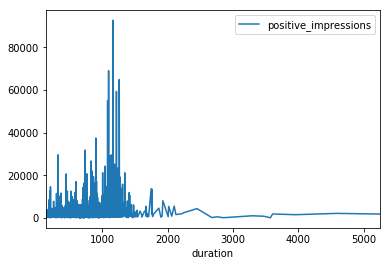

In [22]:
data_frame.sort_values(by=['duration']).plot.line(x='duration', y='positive_impressions')

### Duration and negative impressions

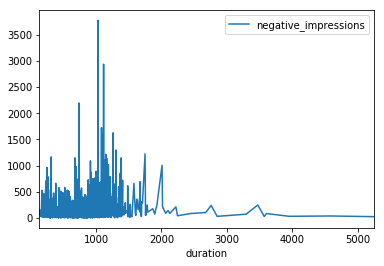

In [23]:
data_frame.sort_values(by=['duration']).plot.line(x='duration', y='negative_impressions')

### Duration and popularity

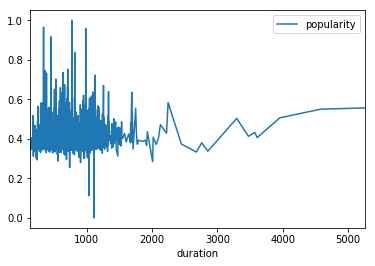

In [24]:
data_frame.sort_values(by=['duration']).plot.line(x='duration', y='popularity')

### Observation

Too long of a talk seems to have a negative effect on popularity.

## TED popularity over the years

In [25]:
data_over_years = {}

for i in range(0, len(data_frame.published_date)):
    date = datetime.fromtimestamp(data_frame.published_date[i])
    year = date.year

    if year not in data_over_years:
        data_over_years[year] = {"count": 0, "popularity": 0}
    
    data_over_years[year]["count"] += 1
    data_over_years[year]["popularity"] += data_frame.popularity[i]
    
for key, value in data_over_years.items():
    data_over_years[key] = value["popularity"] / value["count"]
    
data_over_years



{2006: 0.39996860940448786,
 2007: 0.41381514866659996,
 2008: 0.40894505201224873,
 2009: 0.39954647643061886,
 2010: 0.4389153992722826,
 2011: 0.4340354808190156,
 2012: 0.4184196940316638,
 2013: 0.38633541093474283,
 2014: 0.39057292125711107,
 2015: 0.3850611487776203,
 2016: 0.38732940751035005,
 2017: 0.36883280536532076}

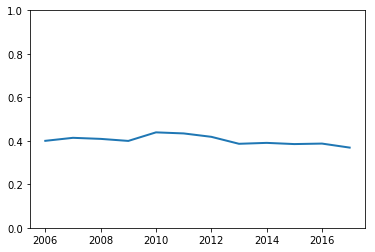

In [26]:
years = list(data_over_years.keys())
popularity = list(data_over_years.values())

ax = plt.subplot()
line, = plt.plot(years, popularity, lw=2)

plt.ylim(0,1)
plt.show()

### Observation

TED popularity seems to be sightly decreasing over the years. It also looks like the peak of TED talks popularity was in 2010 and 2011.

## Hot topics over the years

In [27]:
hot_topics = {}

for i in range(0, len(data_frame.published_date)):
    date = datetime.fromtimestamp(data_frame.published_date[i])
    year = date.year
    
    if year not in hot_topics:
        hot_topics[year] = {}
        
    for tag in data_frame.tags[i]:
        if tag not in hot_topics[year]:
            hot_topics[year][tag] = 0
            
        hot_topics[year][tag] += 1
        

    
for key, value in hot_topics.items():
    hot_topics[key] = sorted(hot_topics[key])[:5]
    
hot_topics

{2006: ['AIDS', 'Africa', 'Asia', 'Christianity', 'DNA'],
 2007: ['AI', 'AIDS', 'Africa', 'Asia', 'Bioethics'],
 2008: ['AI', 'AIDS', 'Africa', "Alzheimer's", 'Asia'],
 2009: ['AIDS', 'Africa', 'Anthropocene', 'Asia', 'DNA'],
 2010: ['AI', 'AIDS', 'Africa', 'Anthropocene', 'Asia'],
 2011: ['AI', 'Africa', 'Anthropocene', 'Asia', 'Bioethics'],
 2012: ['3d printing', 'AI', 'AIDS', 'Africa', "Alzheimer's"],
 2013: ['3d printing', 'AI', 'AIDS', 'Africa', "Alzheimer's"],
 2014: ['3d printing', 'AI', 'Africa', "Alzheimer's", 'Anthropocene'],
 2015: ['AI', 'AIDS', 'Addiction', 'Africa', "Alzheimer's"],
 2016: ['AI', 'AIDS', 'Addiction', 'Africa', 'Anthropocene'],
 2017: ['AI', 'AIDS', 'Addiction', 'Africa', "Alzheimer's"]}

### Observation

In the list of the popular topics over the years we can see some topics that are generally popular and appear each year, as well as some that have high peak of popularity for just a few years.